## Observations and Insights

Capomulin, the drug of interest produced by Pymaceuticals has a very high impact on Tumor volume and was second only to Ramicane among the ten different regiimen tested;
The bar plot shows that Capomulin and Ramicane had the highest number of data points making the data reliable while comparing to other regimens;
Pie plots clearly show that the number of male and female mice were very similar and that helps ensure the impact of gender is taken into account for the study;
The 4 most promising treatment regimens are Ramicane, Capomulin, Caftamin, Infubinol;
Mouse ID s185 was chosen for the line graph and Capomulin has a linear relationship on tumor volume with time upto 45 days;
The correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen shows a very strong correlation with a R square value of 0.84


## Dependencies and starter code

In [350]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
pymaceuticals_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
pymaceuticals_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [351]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [352]:
#Summary table with mean, median, variance, standard dev and SEM of Tumor Volume for each regimen
summary_mean = pymaceuticals_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
summary_median = pymaceuticals_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
summary_variance = pymaceuticals_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
summary_standarddev = pymaceuticals_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
summary_sem = pymaceuticals_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
## Create a table
summary = pd.DataFrame({"mean": summary_mean,
                        "median": summary_median,
                        "variance": summary_variance,
                        "standard dev": summary_standarddev,
                        "SEM": summary_sem})
# Format to 2 decimal points
summary ["mean"] = summary["mean"].map("{:.2f}".format)
summary ["median"] = summary["median"].map("{:.2f}".format)
summary ["variance"] = summary["variance"].map("{:.2f}".format)
summary ["standard dev"] = summary["standard dev"].map("{:.2f}".format)
summary ["SEM"] = summary["SEM"].map("{:.2f}".format)

summary

,mean,median,variance,standard dev,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar plots

In [353]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

In [354]:

treatment_count = pymaceuticals_df.groupby("Drug Regimen").count()["Mouse ID"]

treatment_regimen = pd.DataFrame({"count": treatment_count})
treatment_regimen

,count
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


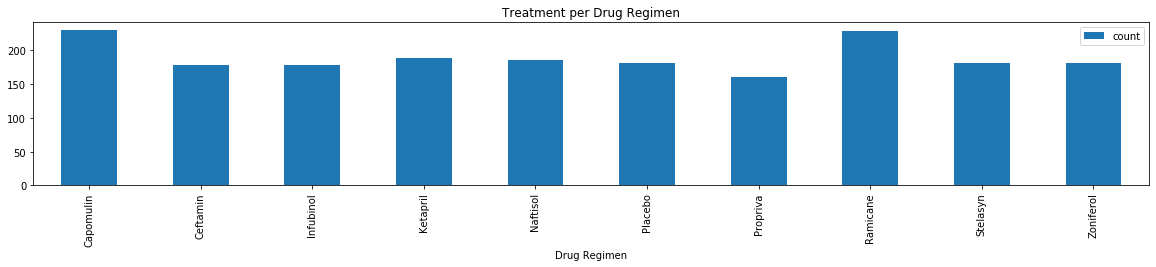

<Figure size 432x288 with 0 Axes>

In [376]:
# Use DataFrame.plot() in order to create a bar chart of the data
treatment_regimen.plot(kind="bar", figsize=(20,3))

# Set a title for the chart
plt.title("Treatment per Drug Regimen")
plt.savefig('data/barplot1.png')
plt.show()
plt.tight_layout()

In [356]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

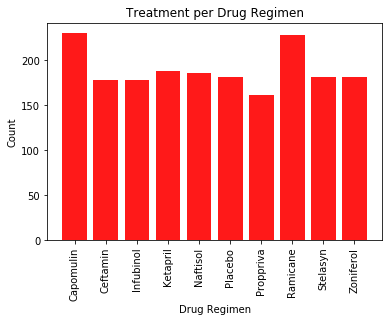

In [377]:
# Using MatplotLib to Chart a DataFrame
# Set x axis and tick locations
regimen = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Proppriva", "Ramicane", "Stelasyn", "Zoniferol"]
x_axis = np.arange(0, len(treatment_regimen))
#tick_locations = [value for value in x_axis]
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
    
plt.title("Treatment per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

#plt.xlim(-0.75, len(x_axis))
#plt.ylim(0, max(treatment__regiment["count"])+10)

plt.bar(x_axis, treatment_regimen["count"], facecolor="red", alpha=0.9, align="center")
plt.xticks(tick_locations, regimen, rotation ="vertical")
plt.savefig('data/barplot2.png')
plt.show()



## Pie plots

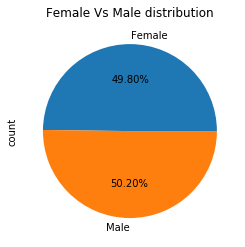

In [378]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#get unique ID

unique_mice = pymaceuticals_df.loc[:, ["Mouse ID", "Sex"]]
unique_mice = unique_mice.drop_duplicates()

mice_sex1 = unique_mice.groupby(["Sex"]).size().reset_index(name='count')

mice_sex1.plot.pie(y = 'count', labels = mice_sex1["Sex"], legend=False, autopct="%.2f%%")

# Set a title for the chart
plt.title("Female Vs Male distribution")
plt.savefig('data/Pieplot1.png')
plt.show()



In [379]:
#Unique mouse
unique_mice

,Mouse ID,Sex
0,k403,Male
10,s185,Female
20,x401,Female
30,m601,Male
40,g791,Male
...,...,...
1858,z314,Female
1860,z435,Female
1863,z581,Female
1873,z795,Female


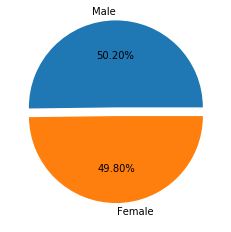

In [380]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#dataframe for sex of mice
sex_count = unique_mice["Sex"].value_counts()
sex_summary = pd.DataFrame({"Total Count":sex_count})


labels = ["Male", "Female"]
explode = (0.1,0)

plt.pie(sex_count, explode=explode, labels=labels, autopct= "%.2f%%")
plt.savefig('data/pieplot2.png')
plt.show()

## Quartiles, outliers and boxplots

Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [381]:
# find the mean of Timepoint with each drug regimen and creat df
tumor_timepoint_mean = pd.DataFrame(pymaceuticals_df.groupby(["Drug Regimen", "Timepoint"])["Tumor Volume (mm3)"].mean())
tumor_timepoint_mean = tumor_timepoint_mean.reset_index()
tumor_timepoint_mean = tumor_timepoint_mean.pivot(values = "Tumor Volume (mm3)", index = 'Timepoint', columns = "Drug Regimen")
# look for most promising treatment - % change from 0 timepoint to 45 timepoint
percentage_change = (tumor_timepoint_mean.loc[45, :] - tumor_timepoint_mean.loc[0, :]) / tumor_timepoint_mean.loc[0,:] *100
percentage_change


Drug Regimen
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [371]:
#Based on above results, the 4 most promising treatment regimens are Ramicane, Capomulin, Caftamin, Infubinol
#Final volume of each mouse
#Create DF with "Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)" with timepoint == 45 and Drug Regimen == Ramicane, Capomulin, Ceftamin, Infubinol
Final_tumor_volume1 = Final_tumor_volume1.loc[(pymaceuticals_df["Timepoint"] == 45) ,["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]
Final_tumor_volume1
#& ((pymaceuticals_df["Drug Regimen"] == "Ramicane") or (pymaceuticals_df["Drug Regimen"] == "Capomulin") or (pymaceuticals_df["Drug Regimen"] == "Ceftamin") or (pymaceuticals_df["Drug Regimen"] == "Infubinol"))
#Final_tumor_volume2 = Final_tumor_volume2.loc[(Final_tumor_volume1["Drug Regimen"] == "Ramicane"), ["Mouse ID", "Tumor Volume (mm3)"]]
#Final_tumor_volume2
#Final_tumor_volume2 = Final_tumor_volume1.pivot(values = "Tumor Volume (mm3)", index = 'Mouse ID', columns = "Drug Regimen")
#Final_tumor_volume3 = Final_tumor_volume2[["Ramicane", "Capomulin", "Ceftamin", "Infubinol"]]

#Final_tumor_volume3



,Mouse ID,Drug Regimen,Tumor Volume (mm3)
9,k403,Ramicane,22.050126
19,s185,Capomulin,23.343598
29,x401,Capomulin,28.484033
39,m601,Capomulin,28.430964
49,g791,Ramicane,29.128472
...,...,...,...
1845,y769,Ceftamin,68.594745
1855,y865,Ceftamin,64.729837
1872,z581,Infubinol,62.754451
1882,z795,Naftisol,65.741070


Generate a box plot of the final tumor volume of each mouse across four regimens of interest

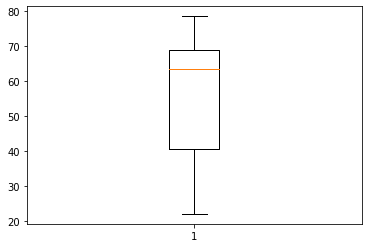

In [363]:
# Final_tumor_volume1   column Tumor Volume (mm3)
box_finaltumorvolume = Final_tumor_volume1["Tumor Volume (mm3)"]

fig1,ax1 = plt.subplots()

ax1.boxplot(box_finaltumorvolume)
plt.savefig('data/boxplot1.png')
plt.show()
                                           





In [364]:
#calculate quartiles
quartiles = box_finaltumorvolume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of final tumor is: {lowerq}")
print(f"The upper quartile of final tumor  is: {upperq}")
print(f"The interquartile range of final tumor is: {iqr}")
print(f"The the median of final tumor  is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of final tumor is: 40.6583443125
The upper quartile of final tumor  is: 68.8702959775
The interquartile range of final tumor is: 28.211951665000008
The the median of final tumor  is: 63.53754596 
Values below -1.6595831850000096 could be outliers.
Values above 111.18822347500002 could be outliers.


## Line and scatter plots

In [365]:
# Generate a line plot of time point versus tumor volume for a mouse (mouse ID: 185) treated with Capomulin
lineplot_capomulin = pymaceuticals_df[["Mouse ID","Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]
lineplot_capomulin = lineplot_capomulin.loc[(lineplot_capomulin["Drug Regimen"] == "Capomulin") & (lineplot_capomulin["Mouse ID"] == "s185"),["Timepoint","Tumor Volume (mm3)"]]
#lineplot_capomulin



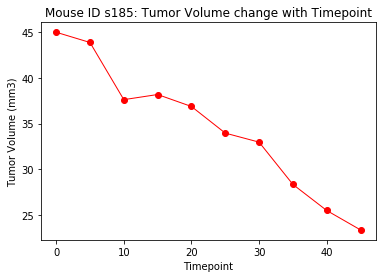

In [382]:
x_axis = lineplot_capomulin["Timepoint"]
y_axis = lineplot_capomulin["Tumor Volume (mm3)"]#lineplot_capomulin.plot(kind = 'line', use_index=True)

plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse ID s185: Tumor Volume change with Timepoint")
plt.plot(x_axis, y_axis, marker="o", color="red", linewidth=1)
plt.savefig('data/lineplot.png')
plt.show()


In [367]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [368]:
scatterplot_capomulin = pymaceuticals_df[["Mouse ID","Drug Regimen", "Weight (g)", "Tumor Volume (mm3)"]]
scatterplot_capomulin = scatterplot_capomulin.loc[scatterplot_capomulin["Drug Regimen"] == "Capomulin", ["Mouse ID","Weight (g)","Tumor Volume (mm3)"]]
#scatterplot_capomulin
average_tumorvol = scatterplot_capomulin.groupby(["Mouse ID"]).mean()["Tumor Volume (mm3)"]
average_weight = scatterplot_capomulin.groupby(["Mouse ID"]).mean()["Weight (g)"]

scatterplot_capomulin2 = pd.DataFrame({"Avg. Tumor Volume (mm3)": average_tumorvol,
                                      "Avg. Weight": average_weight })
scatterplot_capomulin2




,Avg. Tumor Volume (mm3),Avg. Weight
Mouse ID,,
b128,41.963636,22
b742,40.083699,21
f966,36.505973,17
g288,41.990097,19
g316,44.613344,22
i557,44.805810,24
i738,39.141053,20
j119,44.465236,23
j246,43.216925,21


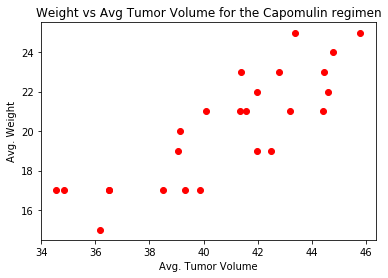

In [383]:

##scatter plot
x_axis_scatter = scatterplot_capomulin2["Avg. Tumor Volume (mm3)"]
y_axis_scatter = scatterplot_capomulin2["Avg. Weight"]

plt.xlabel("Avg. Tumor Volume")
plt.ylabel("Avg. Weight")
plt.title("Weight vs Avg Tumor Volume for the Capomulin regimen")

plt.scatter(x_axis_scatter, y_axis_scatter, marker="o", color="red")


plt.savefig('data/scatterplot1.png')
plt.show()


Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

The r-squared is: 0.8419363424694718
The line equation is: y = 0.74x + -10.15


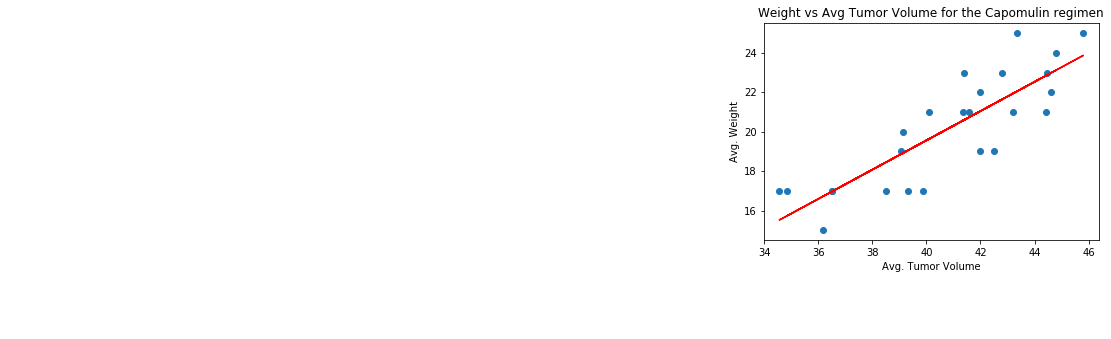

In [384]:
# add linear regression

x_axis_scatter = scatterplot_capomulin2["Avg. Tumor Volume (mm3)"]
y_axis_scatter = scatterplot_capomulin2["Avg. Weight"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter, y_axis_scatter)
regress_values = x_axis_scatter * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis_scatter,y_axis_scatter)
plt.plot(x_axis_scatter,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel("Avg. Tumor Volume")
plt.ylabel("Avg. Weight")
plt.title("Weight vs Avg Tumor Volume for the Capomulin regimen")

print(f"The r-squared is: {rvalue}")
print(f"The line equation is: {line_eq}")
plt.savefig('data/regression.png')
plt.show()